In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:90% !important;}</style>"))

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')
sns.set_palette("rainbow")
plt.rcParams.update({'font.size': 18})

In [2]:
#εδώ κανω import τις μεθόδους που θα χρειαστώ
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix,precision_score, recall_score, f1_score, accuracy_score

In [3]:
import pickle
with open('part2_results/part2.pkl', 'rb') as h:
    X_train, X_test, y_train, y_test, sel_cols_lr, sel_cols_rf, sel_cols_kbest = pickle.load(h)

## Logistic Regression

In [4]:
log_model = LogisticRegression(random_state=123).fit(X_train[sel_cols_lr], y_train)
log_preds = log_model.predict(X_test[sel_cols_lr])

print(f'Precision : {precision_score(y_test,log_preds)}')
print(f'Recall : {recall_score(y_test,log_preds)}')
print(f'F1 Score : {f1_score(y_test,log_preds)}')
print(f'Accuracy : {accuracy_score(y_test,log_preds)}')
      
print(confusion_matrix(y_test, log_preds))

Precision : 0.8
Recall : 0.8181818181818182
F1 Score : 0.8089887640449439
Accuracy : 0.83
[[47  9]
 [ 8 36]]


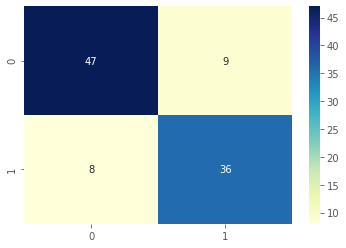

In [5]:
sns.heatmap(confusion_matrix(y_test, log_preds),cmap="YlGnBu", annot=True);

In [6]:
log_model = LogisticRegression(penalty='none', solver='lbfgs',random_state=123).fit(X_train[sel_cols_lr], y_train)
log_preds_1 = log_model.predict(X_test[sel_cols_lr])

print(f'Precision : {precision_score(y_test,log_preds_1)}')
print(f'Recall : {recall_score(y_test,log_preds_1)}')
print(f'F1 Score : {f1_score(y_test,log_preds_1)}')
print(f'Accuracy : {accuracy_score(y_test,log_preds_1)}')
      
print(confusion_matrix(y_test, log_preds_1))

Precision : 0.7954545454545454
Recall : 0.7954545454545454
F1 Score : 0.7954545454545455
Accuracy : 0.82
[[47  9]
 [ 9 35]]


In [7]:
log_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=123).fit(X_train[sel_cols_lr], y_train)
log_preds_2 = log_model.predict(X_test[sel_cols_lr])

print(f'Precision : {precision_score(y_test,log_preds_2)}')
print(f'Recall : {recall_score(y_test,log_preds_2)}')
print(f'F1 Score : {f1_score(y_test,log_preds_2)}')
print(f'Accuracy : {accuracy_score(y_test,log_preds_2)}')
      
print(confusion_matrix(y_test, log_preds_2))

Precision : 0.782608695652174
Recall : 0.8181818181818182
F1 Score : 0.8
Accuracy : 0.82
[[46 10]
 [ 8 36]]


''

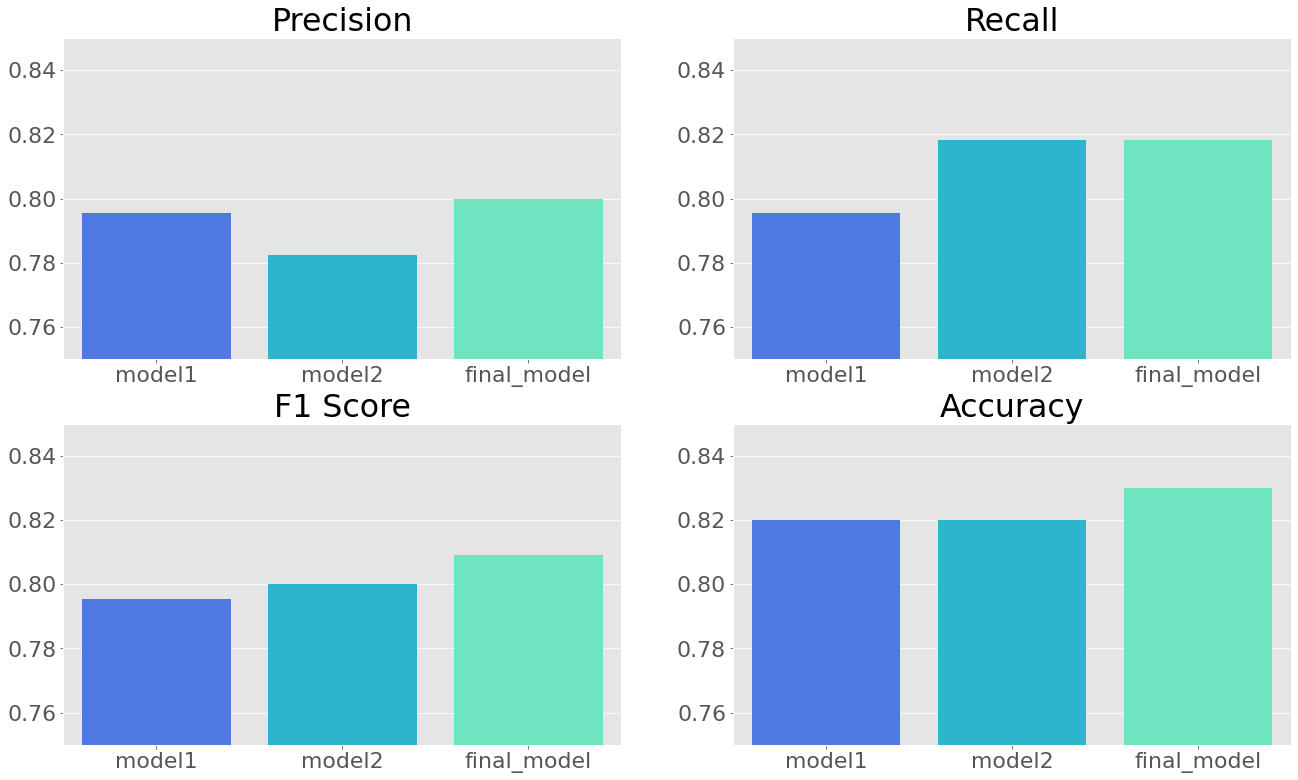

In [9]:
m1_prec, m2_prec, final_model_prec = precision_score(y_test, log_preds_1), precision_score(y_test, log_preds_2), precision_score(y_test, log_preds)
m1_rec, m2_rec, final_model_rec = recall_score(y_test, log_preds_1), recall_score(y_test, log_preds_2), recall_score(y_test, log_preds)
m1_f1, m2_f1, final_model_f1 = f1_score(y_test, log_preds_1), f1_score(y_test, log_preds_2), f1_score(y_test, log_preds)
m1_acc, m2_acc, final_model_acc = accuracy_score(y_test, log_preds_1), accuracy_score(y_test, log_preds_2), accuracy_score(y_test, log_preds)

fig, ax = plt.subplots(2,2, figsize=(22, 13))
sns.barplot(x=['model1', 'model2','final_model'], y=[m1_prec, m2_prec, final_model_prec], ax=ax[0,0])
ax[0,0].set_ylim(0.75, 0.85)
ax[0,0].set_title('Precision')

sns.barplot(x=['model1', 'model2','final_model'], y=[m1_rec, m2_rec, final_model_rec], ax=ax[0,1])
ax[0,1].set_ylim(0.75, 0.85)
ax[0,1].set_title('Recall')

sns.barplot(x=['model1', 'model2','final_model'], y=[m1_f1, m2_f1, final_model_f1], ax=ax[1,0])
ax[1,0].set_ylim(0.75, 0.85)
ax[1,0].set_title('F1 Score')

sns.barplot(x=['model1', 'model2','final_model'], y=[m1_acc, m2_acc, final_model_acc], ax=ax[1,1])
ax[1,1].set_ylim(0.75, 0.85)
ax[1,1].set_title('Accuracy')
;

In [10]:
final_model = LogisticRegression(random_state=123).fit(X_train[sel_cols_lr], y_train)
scores = cross_val_score(final_model, X_train[sel_cols_lr], y_train, cv=5)
print(np.mean(scores))
print(np.var(scores))
scores

0.8229268292682926
0.000976591314693634


array([0.80487805, 0.7804878 , 0.82926829, 0.825     , 0.875     ])

## Random Forest 

In [11]:
rf_model = RandomForestClassifier(n_estimators= 15, max_depth = 8, min_samples_leaf=4, 
                                  random_state=123).fit(X_train[sel_cols_rf], y_train)
rf_preds_1 = rf_model.predict(X_test[sel_cols_rf])

print(f'Precision : {precision_score(y_test,rf_preds_1)}')
print(f'Recall : {recall_score(y_test,rf_preds_1)}')
print(f'F1 Score : {f1_score(y_test,rf_preds_1)}')
print(f'Accuracy : {accuracy_score(y_test,rf_preds_1)}')
      
print(confusion_matrix(y_test, rf_preds_1))

Precision : 0.7619047619047619
Recall : 0.7272727272727273
F1 Score : 0.7441860465116279
Accuracy : 0.78
[[46 10]
 [12 32]]


In [12]:
rf_model = RandomForestClassifier(n_estimators= 30, max_depth = 3, min_samples_leaf=4, 
                                  random_state = 123).fit(X_train[sel_cols_rf], y_train)
rf_preds_2 = rf_model.predict(X_test[sel_cols_rf])

print(f'Precision : {precision_score(y_test,rf_preds_2)}')
print(f'Recall : {recall_score(y_test,rf_preds_2)}')
print(f'F1 Score : {f1_score(y_test,rf_preds_2)}')
print(f'Accuracy : {accuracy_score(y_test,rf_preds_2)}')
      
print(confusion_matrix(y_test, rf_preds_2))

Precision : 0.8
Recall : 0.7272727272727273
F1 Score : 0.761904761904762
Accuracy : 0.8
[[48  8]
 [12 32]]


In [13]:
final_model = RandomForestClassifier(n_estimators= 20, max_depth = 5, min_samples_leaf=2, 
                                  random_state = 123).fit(X_train[sel_cols_rf], y_train)
rf_preds = final_model.predict(X_test[sel_cols_rf])

print(f'Precision : {precision_score(y_test,rf_preds)}')
print(f'Recall : {recall_score(y_test,rf_preds)}')
print(f'F1 Score : {f1_score(y_test,rf_preds)}')
print(f'Accuracy : {accuracy_score(y_test,rf_preds)}')
      
print(confusion_matrix(y_test, rf_preds))

Precision : 0.7906976744186046
Recall : 0.7727272727272727
F1 Score : 0.7816091954022988
Accuracy : 0.81
[[47  9]
 [10 34]]


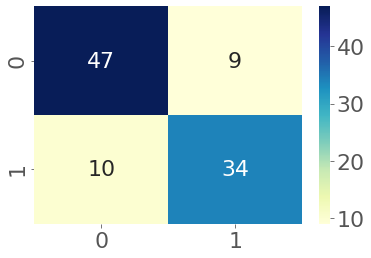

In [14]:
sns.heatmap(confusion_matrix(y_test, rf_preds),cmap="YlGnBu", annot=True);

In [15]:
#Τέλος, ελέγχουμε τη σταθερότητα του μοντέλου που επιλέξαμε. Το cross_score_val, μας δείχνει πως διακυμαίνεται η μεταβλητότητα του
#accuracy του κάθε μοντέλου, όταν αυτό εκτελείται σε διαφορετικές διαμοιράσεις του dataset. Δηλαδή, εάν παρατηρήσουμε μεγάλη διαφορά του
#accuracy στις διαφορετικές διαμερίσεις του dataset, αυτό σημαίνει πως για κάθε Χ subset, το y προβλέπεται με διαφορετική σιγουριά, το
#οποίο συνεπάγεται στο ότι το μοντέλο μας δεν κάνει σωστή γενίκευση όταν βλέπει καινούρια δεδομένα.
scores = cross_val_score(final_model, X_train[sel_cols_rf], y_train, cv=5)
print(np.mean(scores))
print(np.var(scores))
scores

0.7880487804878048
0.0023825996430696006


array([0.82926829, 0.73170732, 0.82926829, 0.825     , 0.725     ])

Text(0.5, 1.0, 'Accuracy')

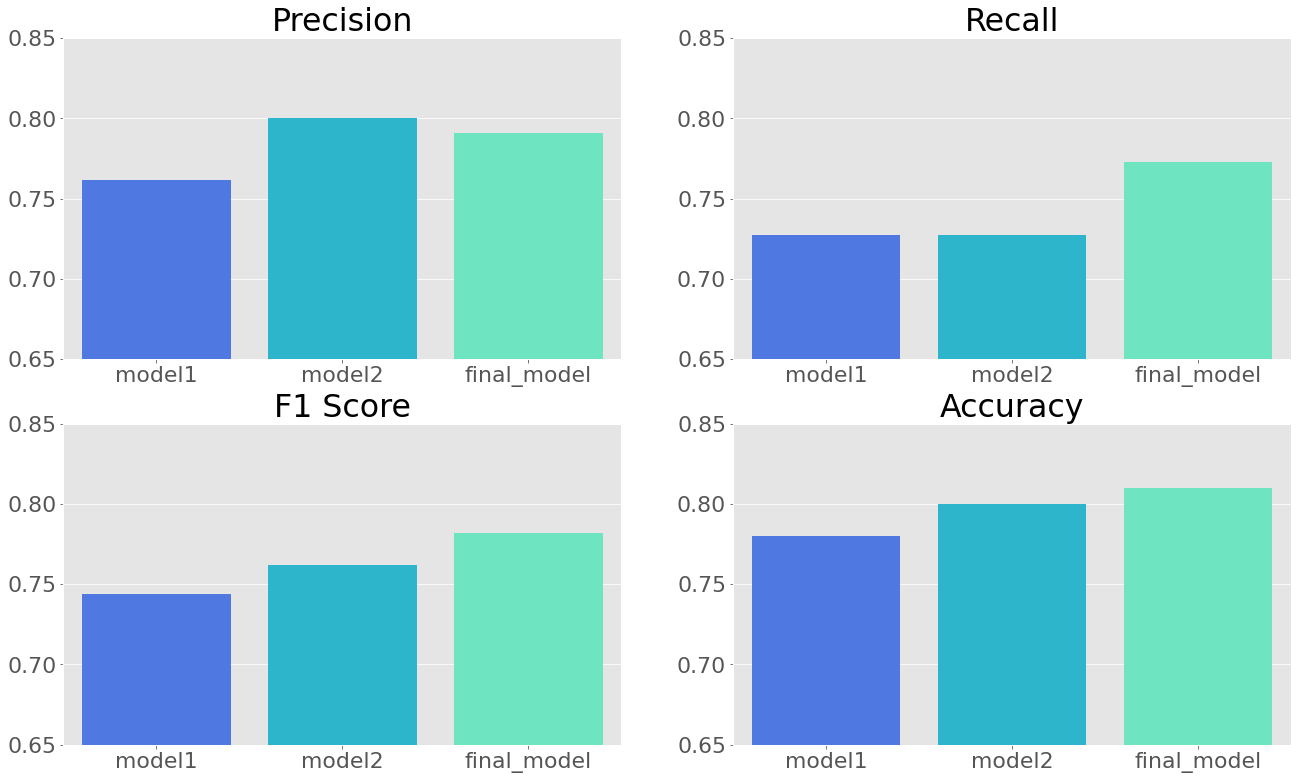

In [16]:
m1_prec, m2_prec, final_model_prec = precision_score(y_test, rf_preds_1), precision_score(y_test, rf_preds_2), precision_score(y_test, rf_preds)
m1_rec, m2_rec, final_model_rec = recall_score(y_test, rf_preds_1), recall_score(y_test, rf_preds_2), recall_score(y_test, rf_preds)
m1_f1, m2_f1, final_model_f1 = f1_score(y_test, rf_preds_1), f1_score(y_test, rf_preds_2), f1_score(y_test, rf_preds)
m1_acc, m2_acc, final_model_acc = accuracy_score(y_test, rf_preds_1), accuracy_score(y_test, rf_preds_2), accuracy_score(y_test, rf_preds)

fig, ax = plt.subplots(2,2, figsize=(22, 13))
sns.barplot(x=['model1', 'model2','final_model'], y=[m1_prec, m2_prec, final_model_prec], ax=ax[0,0])
ax[0,0].set_ylim(0.65, 0.85)
ax[0,0].set_title('Precision')

sns.barplot(x=['model1', 'model2','final_model'], y=[m1_rec, m2_rec, final_model_rec], ax=ax[0,1])
ax[0,1].set_ylim(0.65, 0.85)
ax[0,1].set_title('Recall')

sns.barplot(x=['model1', 'model2','final_model'], y=[m1_f1, m2_f1, final_model_f1], ax=ax[1,0])
ax[1,0].set_ylim(0.65, 0.85)
ax[1,0].set_title('F1 Score')

sns.barplot(x=['model1', 'model2','final_model'], y=[m1_acc, m2_acc, final_model_acc], ax=ax[1,1])
ax[1,1].set_ylim(0.65, 0.85)
ax[1,1].set_title('Accuracy')

## Naive Bayes

In [17]:
nb_model = GaussianNB().fit(X_train[sel_cols_kbest], y_train)
nb_preds = nb_model.predict(X_test[sel_cols_kbest])

print(f'Precision : {precision_score(y_test,nb_preds)}')
print(f'Recall : {recall_score(y_test,nb_preds)}')
print(f'F1 Score : {f1_score(y_test,nb_preds)}')
print(f'Accuracy : {accuracy_score(y_test,nb_preds)}')
      
print(confusion_matrix(y_test, nb_preds))

Precision : 0.7857142857142857
Recall : 0.75
F1 Score : 0.7674418604651163
Accuracy : 0.8
[[47  9]
 [11 33]]


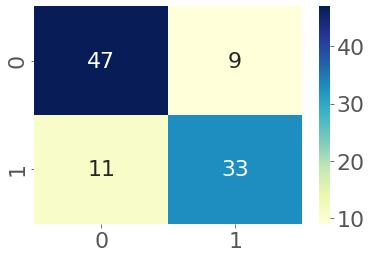

In [18]:
sns.heatmap(confusion_matrix(y_test, nb_preds), cmap="YlGnBu", annot=True);

In [19]:
scores = cross_val_score(nb_model, X_train[sel_cols_kbest], y_train, cv=5)
print(np.mean(scores))
print(np.var(scores))
scores

0.8525609756097561
0.0016142772159428917


array([0.80487805, 0.82926829, 0.85365854, 0.925     , 0.85      ])

------------------------------

## MLP 

In [20]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10,3,10,), random_state=123).fit(X_train[sel_cols_kbest], y_train)
mlp_preds = mlp_model.predict(X_test[sel_cols_kbest])

print(f'Precision : {precision_score(y_test,mlp_preds)}')
print(f'Recall : {recall_score(y_test,mlp_preds)}')
print(f'F1 Score : {f1_score(y_test,mlp_preds)}')
print(f'Accuracy : {accuracy_score(y_test,mlp_preds)}')
      
print(confusion_matrix(y_test, mlp_preds))

Precision : 0.8888888888888888
Recall : 0.7272727272727273
F1 Score : 0.7999999999999999
Accuracy : 0.84
[[52  4]
 [12 32]]


c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
parameter_space = {
    'hidden_layer_sizes': [(16,32,16,), (32,32,), (64,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.001],
    'learning_rate': ['constant','adaptive'],
}

mlp = MLPClassifier(max_iter=500)#.fit(X_train[sel_cols_kbest], y_train)
mlp_search = GridSearchCV(mlp, parameter_space)

In [22]:
mlp_search.fit(X_train[sel_cols_kbest], y_train)

c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stoch

c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stoch

c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stoch

c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(estimator=MLPClassifier(max_iter=500),
             param_grid={'activation': ['tanh', 'relu'], 'alpha': [0.001],
                         'hidden_layer_sizes': [(16, 32, 16), (32, 32), (64,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [23]:
mlp_search.best_params_

{'activation': 'tanh',
 'alpha': 0.001,
 'hidden_layer_sizes': (64,),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [24]:
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), alpha= 0.0001 , learning_rate= 'adaptive', random_state=123).fit(X_train[sel_cols_kbest], y_train)
mlp_preds = mlp_model.predict(X_test[sel_cols_kbest])

mlp_cm = confusion_matrix(y_test, mlp_preds)
names = ['no heart disease', 'heart disease']
print(classification_report(y_test, mlp_preds, target_names = names))
print(mlp_cm)

                  precision    recall  f1-score   support

no heart disease       0.81      0.91      0.86        56
   heart disease       0.86      0.73      0.79        44

        accuracy                           0.83       100
       macro avg       0.84      0.82      0.82       100
    weighted avg       0.83      0.83      0.83       100

[[51  5]
 [12 32]]


c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [25]:
scores = cross_val_score(mlp_model, X_train[sel_cols_kbest], y_train, cv=5)
print(np.mean(scores))
print(np.var(scores))
scores

c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stoch

0.8475609756097562
0.0022157941701368244


c:\users\myrto\appdata\local\programs\python\python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([0.7804878 , 0.85365854, 0.85365854, 0.925     , 0.825     ])